Calculated period, T = 2.1550000000000002 s
Estimated small-displacement angle period, Tharm = 2.0060666807106475 s
SciPy calculated period, T = 2.152874666880516 s


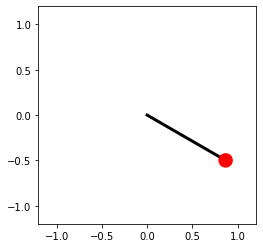

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ellipk
import matplotlib.animation as animation

m, L, g = 1, 1, 9.81 # Mass, Length, Acceleration
theta0, v0 = np.radians(60), 0 # Initial values

approxT = 2 * np.pi * np.sqrt(L / g) # Est of period from small displacement approximation

dt = 0.001 # Time step for numerical integration of the equation of motion (s).
theta, v = [theta0], [v0] # Variable initialisation
old_theta = theta0
i = 0

while True:
    i += 1
    t = i * dt

    old_theta, old_v = theta[-1], v[-1]
    omega = old_v / L # Angular velocity
    new_theta = old_theta - omega * dt

    acc = g * np.sin(old_theta) # Tangential acceleration.
    new_v = old_v + acc * dt # New tangential velocity

    if t > approxT and new_v * old_v < 0:
        # End of period
        break

    theta.append(new_theta)
    v.append(new_v)

# Calculate the estimated pendulum period, T, from our numerical integration,
# and the "exact" value in terms of the complete elliptic integral of the
# first kind.
nsteps = len(theta)
T = nsteps * dt
print('Calculated period, T = {} s'.format(T))
print('Estimated small-displacement angle period, Tharm = {} s'.format(approxT))
k = np.sin(theta0/2)
print('SciPy calculated period, T = {} s'
                .format(2 * approxT / np.pi * ellipk(k**2)))

def get_coords(th):
    """Return the (x, y) coordinates of the bob at angle th."""
    return L * np.sin(th), -L * np.cos(th)

# Initialize the animation plot. Make the aspect ratio equal so it looks right.
fig = plt.figure()
ax = fig.add_subplot(aspect='equal')
# The pendulum rod, in its initial position.
x0, y0 = get_coords(theta0)
line, = ax.plot([0, x0], [0, y0], lw=3, c='k')
# The pendulum bob: set zorder so that it is drawn over the pendulum rod.
bob_radius = 0.08
circle = ax.add_patch(plt.Circle(get_coords(theta0), bob_radius,
                      fc='r', zorder=3))
# Set the plot limits so that the pendulum has room to swing!
ax.set_xlim(-L*1.2, L*1.2)
ax.set_ylim(-L*1.2, L*1.2)

def animate(i):
    """Update the animation at frame i."""
    x, y = get_coords(theta[i])
    line.set_data([0, x], [0, y])
    circle.set_center((x, y))

nframes = nsteps
interval = dt * 1000
ani = animation.FuncAnimation(fig, animate, frames=nframes, repeat=True,
                              interval=interval)
plt.show()
